## OneWeb Orbit Raising

In [71]:
# sanity check tles non orbit raising sat.
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




def sma_plot_stats(tlefilepath: str, sat_name: str = None) -> None:
    with open(tlefilepath, "r") as f:
        data = json.loads(f.read())
    
    satname = data[-1].get("OBJECT_NAME") if sat_name is None else sat_name
    EARTH_RADII = 6.3781e3 #km
    smas = [float(s["SEMIMAJOR_AXIS"]) for s in data]
    alts = [float(s["SEMIMAJOR_AXIS"]) - EARTH_RADII for s in data]
    eccs = [float(s["ECCENTRICITY"]) for s in data]
    raans = [float(s["RA_OF_ASC_NODE"]) for s in data]
    bstars = [float(s["BSTAR"]) for s in data]
    
    #  "2020-12-19T22:00:03.000096",
    dates = [datetime.strptime(s["EPOCH"][:-11], "%Y-%m-%dT%H:%M")  for s in data]
    
    print(f"Max Delta SMA: {max(smas) - min(smas):.4f}km")
    print(f"epoch 0 altitude: {smas[0] - EARTH_RADII}km ")
    
    sma_check = ( float(data[0]["APOAPSIS"]) + float(data[0]["PERIAPSIS"])) / 2
    print(f"epoch 0: altitude check: {sma_check}km ")
    
    ecc_check =  (float(data[0]["APOAPSIS"]) - float(data[0]["PERIAPSIS"])) / (float(data[0]["APOAPSIS"]) + float(data[0]["PERIAPSIS"]))
    print(f"Ecc check: {abs(ecc_check - eccs[0])}")

    print(f"Number of TLEs: {len(smas)}")

    plt.grid()
    plt.scatter(dates, alts) ;
    plt.ylabel("Mean Altitude [km]")
    plt.xticks(rotation=75)
    plt.title(f"Data for {satname}")
    plt.savefig(f"MeanAltitude-{satname}")
    
    plt.figure();
    plt.grid()
    plt.scatter(dates, eccs);
    plt.ylabel("ecc")
    plt.xticks(rotation=75)
    plt.title(f"Data for {satname}")
    
    plt.figure()
    plt.grid()
    plt.scatter(dates, bstars);
    plt.ylabel("BSTAR")
    plt.xticks(rotation=75)
    plt.title(f"Data for {satname}")
    
    plt.figure()
    
#     plt.plot(dates, raans);
    plt.scatter(dates, raans);
    plt.ylabel("RAAN [deg]")
    plt.xticks(rotation=75)
    nodal_precession = np.polyfit([float(date.strftime('%j')) for date in dates ],  raans, deg=1 )[0]
    nodal_precession =  (raans[-10] - raans[-5]) /  (float(dates[-10].strftime('%j')) - float(dates[-5].strftime('%j')))
    plt.title(f"RAAN vs Time for {satname}  \n Approx. Nodal precession: {nodal_precession:.4f}deg/day ")
    

Max Delta SMA: 0.0350km
epoch 0 altitude: 1177.8489999999993km 
epoch 0: altitude check: 1177.814km 
Ecc check: 0.0010054897803897897
Number of TLEs: 50


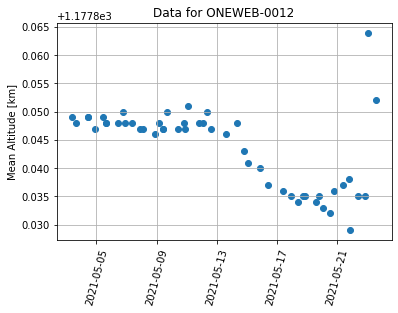

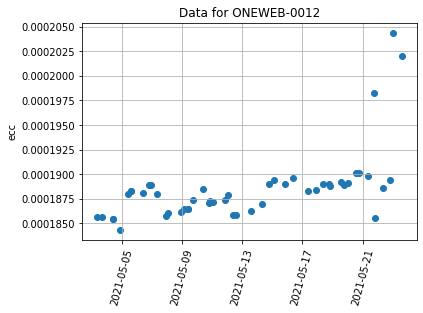

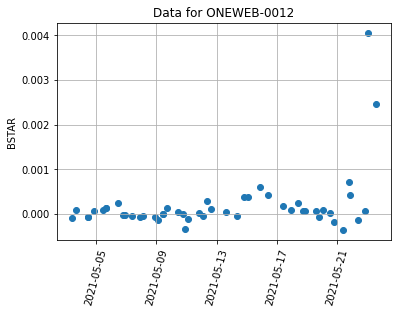

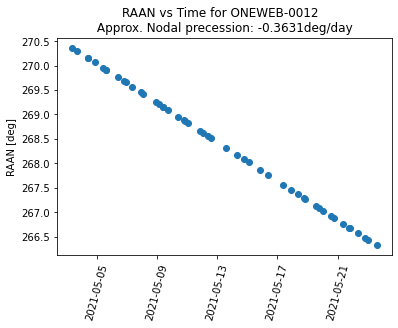

In [73]:
sma_plot_stats("jupytests/oneweb0012_2021-05-03_24.json" )
 



Max Delta SMA: 70.4220km
epoch 0 altitude: 439.683km 
epoch 0: altitude check: 439.6475km 
Ecc check: 0.012025716482522927
Number of TLEs: 92


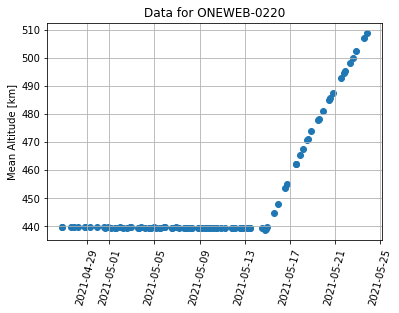

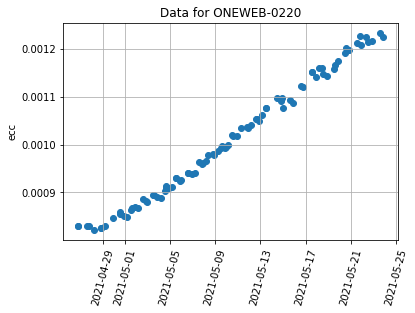

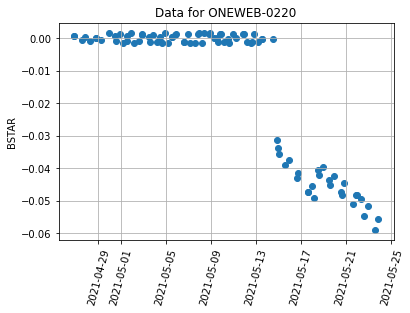

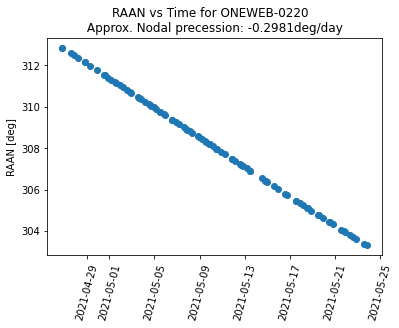

In [74]:
sma_plot_stats("jupytests/oneweb0220_2021-04-25_05-24.json")

Max Delta SMA: 772.3090km
epoch 0 altitude: 453.89799999999923km 
epoch 0: altitude check: 453.86249999999995km 
Ecc check: 0.004075859704205593
Number of TLEs: 441


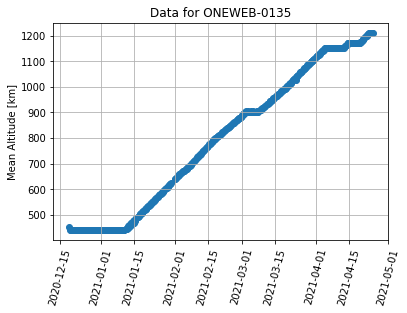

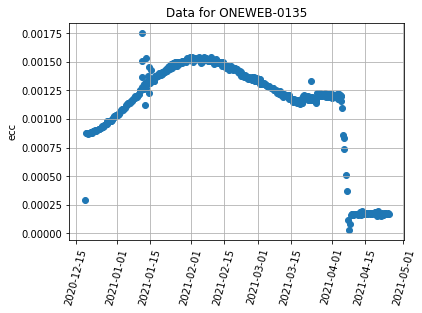

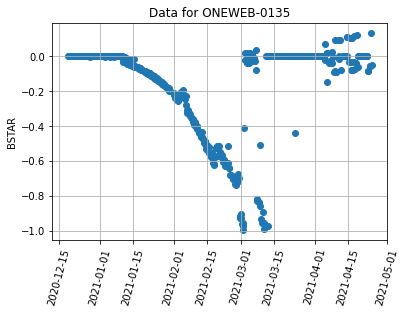

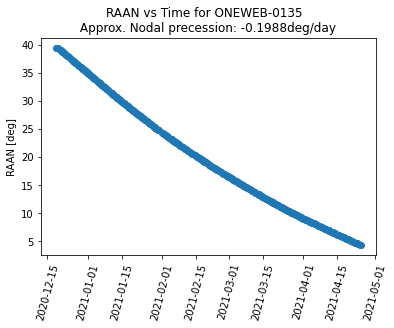

In [75]:
sma_plot_stats("jupytests/oneweb0135_2020-12-28_4-25.json")

Max Delta SMA: 697.8110km
epoch 0 altitude: 453.02099999999973km 
epoch 0: altitude check: 452.986km 
Ecc check: 0.03459080257182338
Number of TLEs: 1143


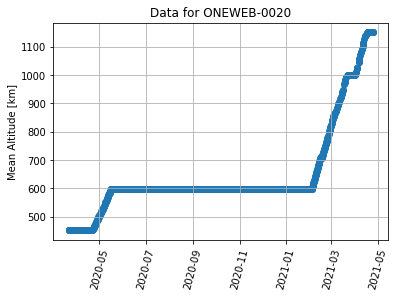

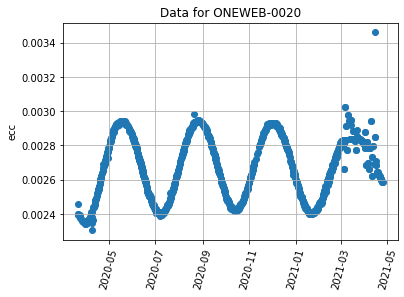

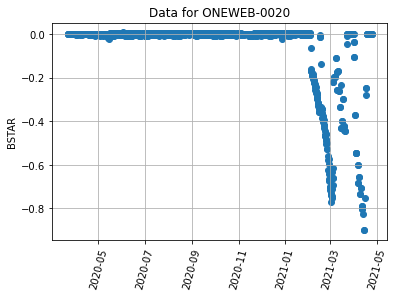

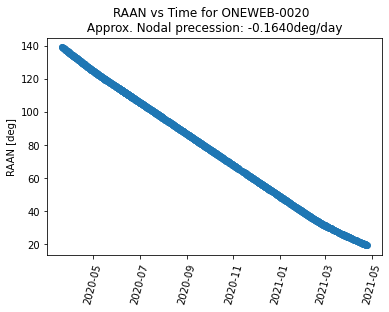

In [76]:
sma_plot_stats("jupytests/oneweb0020_2020-03-21_5-25.json", "ONEWEB-0020")

Max Delta SMA: 0.2350km
epoch 0 altitude: 1177.8229999999994km 
epoch 0: altitude check: 1177.7875km 
Ecc check: 0.0010589707767743141
Number of TLEs: 1121


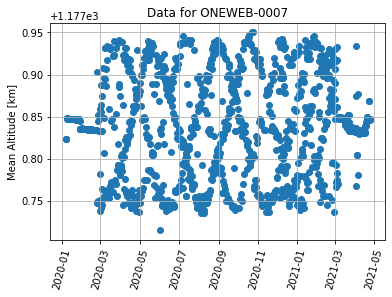

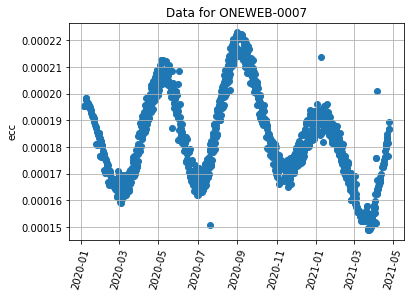

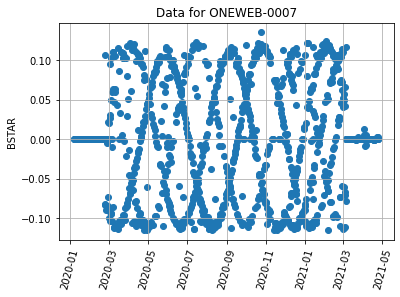

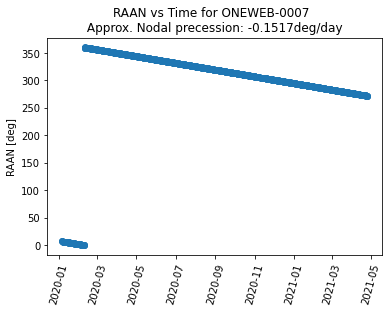

In [77]:
sma_plot_stats("jupytests/oneweb0007_2020-01-05_24.json")

Max Delta SMA: 251.6400km
epoch 0 altitude: 300.701km 
epoch 0: altitude check: 300.66650000000004km 
Ecc check: 0.006010949387111675
Number of TLEs: 1562


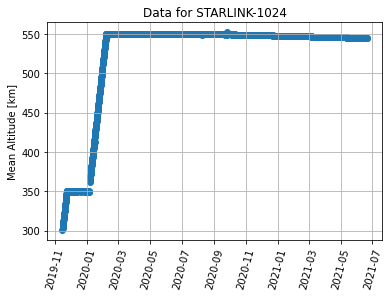

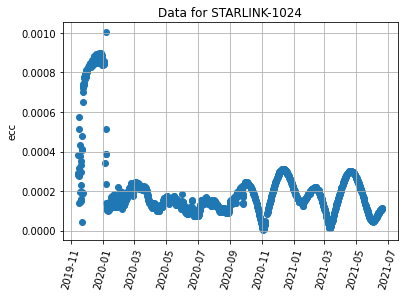

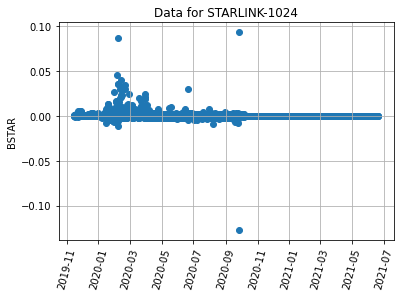

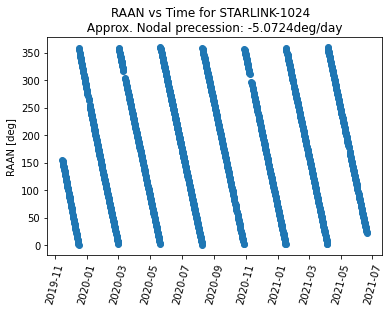

In [78]:
sma_plot_stats("jupytests/Starlink1024_2019-2021.json")

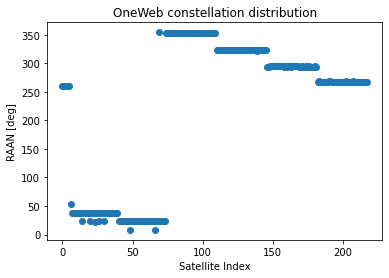

In [82]:
from pprint import pprint
import json
import matplotlib.pyplot as plt
import requests

resp = requests.get("http://celestrak.com/NORAD/elements/gp.php?GROUP=oneweb&FORMAT=json")

data = resp.json()
# with open("oneweb.txt", "r") as file:
#     data = json.load(file)

# data = [sat for sat in data if "2021" not in sat["OBJECT_ID"] ] # filter for sats launched pre 2021
# data = [sat for sat in data if "2021" not in sat["OBJECT_ID"] ] # filter for sats launched pre 2021
raans = [sat["RA_OF_ASC_NODE"] for  sat in data]
incs = [sat["INCLINATION"] for sat in data]

plt.scatter([range(len(raans))], raans)
plt.xlabel("Satellite Index")
plt.ylabel("RAAN [deg]")
plt.title("OneWeb constellation distribution")
plt.show()
planes = [[data[0]]]
nice = 0 
for sat1 in data[1:]:
#     print("sat1: ", sat1["OBJECT_NAME"])
    for idx in range(0,len(planes)+1):
#         print(len(planes))
#         if plane[idx] is None:
#             planes[planeidx] = [sat1]
#         print(idx)
        if idx == len(planes): # last 
#             print("new breaak / new plane")
            planes.append([sat1])
            break
        else:
            sat2 = planes[idx][0]
            if abs(sat1["RA_OF_ASC_NODE"] - sat2["RA_OF_ASC_NODE"]) < 2:
                planes[idx].append(sat1)
                nice += 1
                break


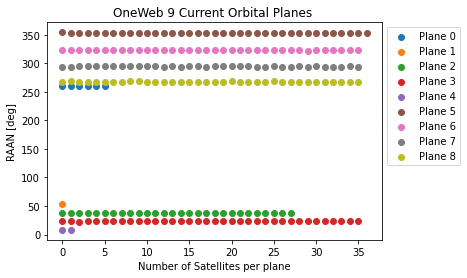

In [83]:
for plane in planes[:]:
    plt.scatter( [range(len(plane))], [sat["RA_OF_ASC_NODE"] for sat in plane ], )
plt.title(f"OneWeb {len(planes)} Current Orbital Planes ");
plt.ylabel("RAAN [deg]");
plt.xlabel("Number of Satellites per plane");
plt.legend([f"Plane {idx}" for idx in range(len(planes))], bbox_to_anchor=(1,1), loc="upper left");


-15.143199999999998

In [21]:
planes[1]

[{'OBJECT_NAME': 'ONEWEB-0013',
  'OBJECT_ID': '2020-008A',
  'EPOCH': '2021-05-23T00:14:05.608896',
  'MEAN_MOTION': 13.09299177,
  'ECCENTRICITY': 0.0001795,
  'INCLINATION': 87.9176,
  'RA_OF_ASC_NODE': 60.0048,
  'ARG_OF_PERICENTER': 61.4645,
  'MEAN_ANOMALY': 298.6662,
  'EPHEMERIS_TYPE': 0,
  'CLASSIFICATION_TYPE': 'U',
  'NORAD_CAT_ID': 45131,
  'ELEMENT_SET_NO': 999,
  'REV_AT_EPOCH': 6457,
  'BSTAR': -0.00057362,
  'MEAN_MOTION_DOT': -1.85e-06,
  'MEAN_MOTION_DDOT': 0}]

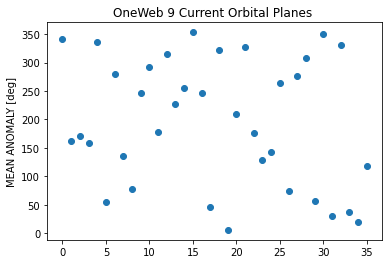

In [53]:
for plane in planes[8:9]:
    plt.scatter( [range(len(plane))], [sat["MEAN_ANOMALY"] for sat in plane ], )
plt.title(f"OneWeb {len(planes)} Current Orbital Planes ");
plt.ylabel("MEAN ANOMALY [deg]");


In [59]:
# plane_colormap = [ for len()]
plt.scatter(zip(*[( range(len(data)), sat["BSTAR"]) for sat in data ]) )

TypeError: scatter() missing 1 required positional argument: 'y'

In [165]:
planes[0][0]

{'OBJECT_NAME': 'ONEWEB-0012',
 'OBJECT_ID': '2019-010A',
 'EPOCH': '2021-05-13T14:38:51.185760',
 'MEAN_MOTION': 13.21811339,
 'ECCENTRICITY': 0.0001863,
 'INCLINATION': 87.9154,
 'RA_OF_ASC_NODE': 268.3222,
 'ARG_OF_PERICENTER': 97.0148,
 'MEAN_ANOMALY': 263.1198,
 'EPHEMERIS_TYPE': 0,
 'CLASSIFICATION_TYPE': 'U',
 'NORAD_CAT_ID': 44057,
 'ELEMENT_SET_NO': 999,
 'REV_AT_EPOCH': 10650,
 'BSTAR': 3.3981e-05,
 'MEAN_MOTION_DOT': 2.7e-07,
 'MEAN_MOTION_DDOT': 0}

In [72]:
len(planes[0][1])

17

In [29]:
abs(data[0]["RA_OF_ASC_NODE"] - data[5]["RA_OF_ASC_NODE"])

0.228999999999985

In [31]:
data[10]["RA_OF_ASC_NODE"]

46.1052

In [65]:
from skyfield.api import load, wgs84
import requests

ts = load.timescale()
stations_url = 'http://celestrak.com/NORAD/elements/oneweb.txt'
# stations_url = 
stations_url = "http://celestrak.com/NORAD/elements/gp.php?GROUP=oneweb&FORMAT=tle"





satellites = load.tle_file(stations_url)
print('Loaded', len(satellites), 'satellites')
print('Loaded', len(satellites), 'satellites')
def getAzElRa(satellites: list[EarthSatellite], satname: str, latlon: tuple([float, float])):

    by_name = {sat.name: sat for sat in satellites}
    satellite = by_name[satname]

    t0 = ts.now()
    ground_station = wgs84.latlon(*latlon)
#     t0 = ts.utc(2021, 5, 23, 18, 18)
#     t1 = ts.utc(2021, 5, 24)
    # t = ts.utc()
    # t, events = satellite.find_events(bluffton, t0, t1, altitude_degrees=30.0)
    # for ti, event in zip(t, events):
    #     name = ('rise above 30°', 'culminate', 'set below 30°')[event]
    #     print(ti.utc_strftime('%Y %b %d %H:%M:%S'), name)

    difference = satellite - ground_station

    topocentric = difference.at(t0)
    el, az, distance = topocentric.altaz()
    print("AZ: ", az)
    print("EL: ", el)
    print("RANGE: ", distance.km)

Loaded 182 satellites
AZ:  132deg 16' 37.3"
EL:  08deg 19' 30.7"
RANGE:  3302.4735764655907


In [40]:
len(satellites)

182

In [80]:
rawdata.split("\r\n")[1][:-2]

'1 44057C 19010A   21143.39166667 -.00003217  00000-0 -78008-2 0  14'

In [81]:

from skyfield.api import EarthSatellite
satellites_supplemental = []
ts = load.timescale()
supplemental_data_url = "http://celestrak.com/NORAD/elements/supplemental/oneweb.txt"
rawdata = requests.get(supplemental_data_url).text
for idx, line in enumerate(rawdata.split("\r\n")):
    if idx % 3 == 0:
        satname = line
        if idx != 0:
            sat = EarthSatellite(tle_line1, tle_line2, satname, ts)
            satellites_supplemental.append(sat)
    if (idx-1)% 3 == 0:
        tle_line1 = line[:-2]
    
    if (idx-2)% 3 == 0:
        tle_line2 = line[:-2]
    

In [82]:
by_name = [sat.name for sat in satellites]




In [83]:
def getAzElRa(satellites: list[EarthSatellite], satname: str, latlon: tuple([float, float])):

    by_name = {sat.name: sat for sat in satellites}
    satellite = by_name[satname]

    t0 = ts.now()
    ground_station = wgs84.latlon(*latlon)
#     t0 = ts.utc(2021, 5, 23, 18, 18)
#     t1 = ts.utc(2021, 5, 24)
    # t = ts.utc()
    # t, events = satellite.find_events(bluffton, t0, t1, altitude_degrees=30.0)
    # for ti, event in zip(t, events):
    #     name = ('rise above 30°', 'culminate', 'set below 30°')[event]
    #     print(ti.utc_strftime('%Y %b %d %H:%M:%S'), name)

    difference = satellite - ground_station

    topocentric = difference.at(t0)
    el, az, distance = topocentric.altaz()
    print("AZ: ", az)
    print("EL: ", el)
    print("RANGE: ", distance.km)

In [84]:
getAzElRa(satellites_supplemental, "ONEWEB-0145", (51.842976, -0.973274))

AZ:  327deg 10' 08.4"
EL:  -76deg 34' 32.8"
RANGE:  13651.806957204873


## OneWeb  - Starlink April 3rd Collision Avoidance

In [71]:
from skyfield.api import load, wgs84, EarthSatellite
import numpy as np

ts = load.timescale()

oneweb_pre_maneuver = EarthSatellite("1 48075U 21025AK  21093.16667824 -.00088667  00000-0 -20860-2 0  9994",
                                    "2 48075  87.3952 346.9456 0009137 216.4912 356.8160 15.42310346  2686", 
                                     "ONEWEB-0178", ts)

oneweb_post_maneuver = EarthSatellite("1 48075U 21025AK  21093.50002315  .00036124  00000-0  83863-3 0  9992", 
                        "2 48075  87.3954 346.8277 0009365 213.5305  49.2926 15.42176008  1794", 
                                      "ONEWEB-0178", ts)


starlink_pre_maneuver = EarthSatellite("1 44762U 19074BB  21093.14499406 -.00000923  00000-0 -43099-4 0  9991",
                                        "2 44762  53.0567  14.0718 0001469  81.7902 278.3253 15.06387809 77101",
                                       "STARLINK-1057", ts)

starlink_post_maneuver = EarthSatellite("1 44762U 19074BB  21093.80846375 -.00000992  00000-0 -47688-4 0  9999",
                                 "2 44762  53.0569  11.0935 0001471  83.0215 277.0942 15.06391203 77032",
                                      "STARLINK-1057", ts)

In [72]:
oneweb_pre_maneuver.epoch.utc

CalendarTuple(year=2021, month=4, day=3, hour=4, minute=0, second=0.99993896484375)

In [83]:

print(oneweb_pre_maneuver.model.ecco)
print(oneweb_post_maneuver.model.ecco)
print((oneweb_pre_maneuver.model.a - oneweb_post_maneuver.model.a) * 6.3781e3)
print(oneweb_post_maneuver.model.a)

0.0009137
0.0009365
-0.39608318693064387
1.0684343895451491


In [86]:
# tca between 2021-04-03T12 --- 2021-04-03T23:59

TIMESPAN = 2*60*60 #  in seconds
TIME_RESOLUTION = 100 # seconds
seconds_span = np.linspace(0, TIMESPAN, int(TIMESPAN/TIME_RESOLUTION))

t = ts.utc(2021, 4, 3, 16, 0, seconds_span) 
# t = ts.utc(2021, 4, 3, 15, 0, 0, range(1, 8 , 1)) 
# t = ts.utc(2021, 4, 1, range(18,20)) 

oneweb_pos = oneweb_post_maneuver.at(t).position.m
oneweb_pre = oneweb_pre_maneuver.at(t).position.m
starlink_pos = starlink_post_maneuver.at(t).position.m
# relative_premaneuver = (oneweb_pre_maneuver - starlink_pre_maneuver).at(t)

distance = lambda relative: np.sqrt(relative[0,:]**2 + relative[1,:]**2 + relative[2,:]**2 )

get_miss_distance = lambda relative: min(np.sqrt(relative[0,:]**2 + relative[1,:]**2 + relative[2,:]**2 ))
print("Pre maneuver altitude: ", get_miss_distance(oneweb_pre)/1000 - 6.3781e3, "km")
print("Post maneuver altitude: ", get_miss_distance(oneweb_pos)/1000 - 6.3781e3, "km")

Pre maneuver altitude:  434.4119063610451 km
Post maneuver altitude:  434.2963274935528 km


In [26]:

print(starlink_pre_maneuver.epoch.utc)
print(oneweb_pre_maneuver.epoch.utc)
print(starlink_post_maneuver.epoch.utc)
print(oneweb_post_maneuver.epoch.utc)

CalendarTuple(year=2021, month=4, day=3, hour=3, minute=28, second=47.486785888671875)
CalendarTuple(year=2021, month=4, day=3, hour=4, minute=0, second=0.99993896484375)
CalendarTuple(year=2021, month=4, day=3, hour=11, minute=26, second=29.350189208984375)
CalendarTuple(year=2021, month=4, day=3, hour=12, minute=0, second=2.000152587890625)


In [36]:

min([sqrt(relpos[0]**2 + relpos[1]**2 + relpos[2]**2) for relpos in relative_premaneuver.position.m] )

2637798.3061161716

In [87]:
t[-1].utc

CalendarTuple(year=2021, month=4, day=3, hour=19, minute=59, second=59.0)

In [95]:
t[1].utc

CalendarTuple(year=2021, month=4, day=3, hour=12, minute=0, second=2.0)

In [12]:
(np.matmul(relative_premaneuver.velocity.m_per_s.T, relative_premaneuver.velocity.m_per_s)).shape

(7, 7)

In [8]:
relative_premaneuver.velocity.m_per_s.shape

(3, 7)

In [13]:
np.sqrt(relative_premaneuver.velocity.m_per_s[0,:]**2 + relative_premaneuver.velocity.m_per_s[1,:]**2 + relative_premaneuver.velocity.m_per_s[2,:]**2)

array([13197.75306302, 13196.60897215, 13195.46533134, 13194.32214665,
       13193.17942408, 13192.03716968, 13190.89538947])